<a href="https://colab.research.google.com/github/gn0262487838/DL_note/blob/master/Mnist_by_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.layers import SimpleRNN, Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np

In [0]:
(x_train, y_train), (x_test_origin, y_test_origin) = mnist.load_data()

x_train, x_test = x_train / 255.0 , x_test_origin / 255.0
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test_origin, num_classes=10)

In [83]:
model = Sequential()
model.add(
    SimpleRNN(batch_input_shape=(None, 28, 28),units=50,unroll=True)
)
model.add(
    Dense(units=10, kernel_initializer="normal")
)
model.add(
    Activation("softmax")
)
model.compile(
    optimizer=Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________


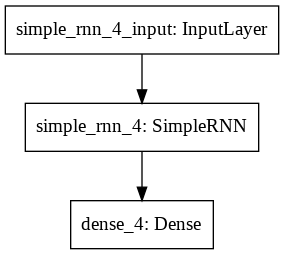

In [64]:
plot_model(model)

In [65]:
BATCH_SIZE = 50
BATCH_INDEX = 0
for step in range(1, 4001):
    # data shape = (batch, step, inputs/outputs)
    x_batch = x_train[BATCH_INDEX:BATCH_INDEX+BATCH_SIZE,:,:]
    y_batch = y_train[BATCH_INDEX:BATCH_INDEX+BATCH_SIZE,:]

    loss = model.train_on_batch(x_batch, y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= x_train.shape[0] else BATCH_INDEX
    
    if step % 500 == 0:
        Eval = model.evaluate(x_test,y_test, batch_size=x_test.shape[0])
        print("預測值:{}".format(Eval))

10000/10000 [==============================] - 0s 12us/sample - loss: 0.6605 - acc: 0.7920
預測值:[0.660453200340271, 0.792]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.5322 - acc: 0.8441
預測值:[0.5321829915046692, 0.8441]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.4394 - acc: 0.8685
預測值:[0.4394392669200897, 0.8685]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.3597 - acc: 0.8946
預測值:[0.3596779406070709, 0.8946]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.3398 - acc: 0.9036
預測值:[0.33982035517692566, 0.9036]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.2953 - acc: 0.9150
預測值:[0.29531827569007874, 0.915]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.2676 - acc: 0.9239
預測值:[0.2675623595714569, 0.9239]
10000/10000 [==============================] - 0s 2us/sample - loss: 0.2873 - acc: 0.9196
預測值:[0.28727665543556213, 0.9196]


In [82]:
X = x_test[0:10,:]
predict = model.predict_classes(X)
print("預測值:", predict.tolist())
print("實際值:", [ i.argmax() for i in y_test[0:10]])

預測值: [7, 2, 1, 0, 4, 1, 4, 9, 0, 9]
實際值: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


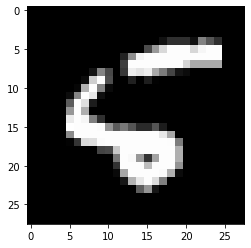

In [78]:
import matplotlib.pyplot as plt
plt.imshow(x_test_origin[8], cmap="gray")
plt.show()